# CS-VQE usage

Here we run through a simple example of CS-VQE to simulate a small test molucule for varying quantum resource expenditure.

In [2]:
import warnings; warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
import cs_vqe.circuit as cs_circ
import utils.cs_vqe_tools_original as cs_tools
import utils.plotting_tools as plot
from utils.molecule_tools import get_molecule
from qiskit.aqua.components.optimizers import COBYLA

First we construct the calculated molecule, obtaining the corresponding Hamiltonian and UCCSD Ansatz operator:

In [3]:
speciesname = "Be_STO-3G_SINGLET"
molecule    = get_molecule(speciesname, taper=True)
num_qubits  = molecule['num_qubits']
ham         = molecule['hamiltonian']
uccsd       = molecule['ansatze']['uccsd']
hf_config   = molecule['hf_config']

print('Num qubits:',   num_qubits, '\n')
print('Hamiltonian:',  ham, '\n')
print('UCCSD Ansatz:', uccsd)

*** sector saved, will check tapered ground state energy matches target problem ***
Attempting to taper 10 --> 5 qubits
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Energies match in sector (1, 1, 1, 1, 1), tapering successful!

Num qubits: 5 

Hamiltonian: {'IIIII': -8.672007378626443, 'ZIIII': -0.29686495248710204, 'IZIII': -0.2968649524871026, 'ZZIII': 0.3892355930337454, 'IIZII': -0.29686495248710226, 'ZIZII': 0.3892355930337437, 'IZZII': 0.3892355930337439, 'ZZZII': 0.2634692002569246, 'IIIZI': -0.04669169228823504, 'ZIIZI': 0.1830962071070612, 'IZIZI': 0.1830962071070611, 'ZZIZI': 0.280714648584383, 'IIZZI': 0.18309620710706132, 'ZIZZI': 0.28071464858438316, 'IZZZI': 0.2807146485843834, 'ZZZZI': 2.24322924426441, 'IIIIZ': -0.046691692288234915, 'ZIIIZ': 0.18309620710706181, 'IZIIZ': 0.1830962071070616, 'ZZIIZ': 0.28071464858438355, 'IIZIZ': 0.18309620710706143, 'ZIZIZ': 0.2807146485843835, 'IZZIZ': 0.2807146485843837, 'ZZZIZ': 2.2432292442644104, 'IIIZZ': 0.6698678645034261, 'ZZZZZ': 0.2

# Create a CS-VQE circuit instance

Our CS-VQE circuit class requires an input Hamiltonian, a noncontextual subset of terms therein, along with the number of qubits in the **full** system and the Hartree-Fock state.

Hamiltonian is contextual? True 

Noncontextual subset: ['IIIII', 'ZZZIZ', 'ZZZZI', 'IIIZZ', 'ZZIII', 'IZZII', 'ZIZII', 'IZIII', 'IIZII', 'ZIIII', 'ZZZZZ', 'IZZIZ', 'ZZIIZ', 'ZIZIZ', 'IZZZI', 'ZIZZI', 'ZZIZI', 'ZZZII', 'ZIIIZ', 'IZIIZ', 'IIZIZ', 'IIZZI', 'ZIIZI', 'IZIZI', 'IIIXI', 'ZZZXI', 'IIIZI', 'IIIIZ', 'IIIXZ', 'ZZZXZ', 'ZIIXZ', 'IZZXZ', 'ZIZXZ', 'ZZIXZ', 'IZIXZ', 'IIZXZ'] 

Noncontextual ground state: 01001 

Be_STO-3G_SINGLET reaches chemical accuracy for a 3-qubit CS-VQE simulation 

CS-VQE errors:


/home/tweaving/.local/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1266: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


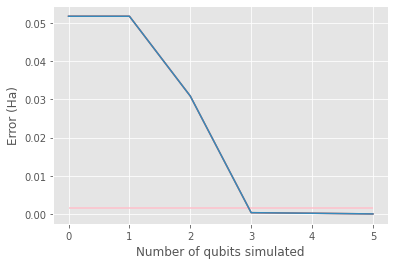

In [4]:
print('Hamiltonian is contextual?', cs_tools.contextualQ_ham(ham), '\n')
terms_noncon = cs_tools.greedy_dfs(ham, 10, criterion='size')[-1]
print('Noncontextual subset:', terms_noncon, '\n')
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian = ham,
                                  terms_noncon= terms_noncon,
                                  num_qubits  = num_qubits,
                                  hf_config   = hf_config)

print('Noncontextual ground state:', mol_circ.reference_state(), '\n')
num_sim_q = mol_circ.chem_acc_num_q
print('{} reaches chemical accuracy for a {}-qubit CS-VQE simulation \n'.format(speciesname, num_sim_q))
print('CS-VQE errors:')
mol_circ.plot_cs_vqe_errors()

Given the number of qubits we wish to simulate, our cs_vqe_circuit instance includes functionality for computing various parameters necessary for constructing a corresponding quantum circuit for our CS-VQE routine:

In [5]:
print('Qubits Included in Simulation:', mol_circ.sim_qubits(num_sim_q)[0])
print('Mapping onto available qubits:', mol_circ.qubit_map(num_sim_q), '\n')
print('{}-qubit reduced Hamiltonian:'.format(num_sim_q), mol_circ.ham_reduced[num_sim_q], '\n')
print('{}-qubit reduced Ansatz:'.format(num_sim_q), mol_circ.project_anz_terms(uccsd, num_sim_q))

Qubits Included in Simulation: (3, 2, 0)
Mapping onto available qubits: {3: 2, 2: 1, 0: 0} 

3-qubit reduced Hamiltonian: {'III': -12.488598002520966, 'ZIZ': -0.858294249713804, 'ZZZ': -0.858294249713804, 'IZI': 0.023043178877557385, 'IZZ': 0.8582942497138036, 'ZZI': -0.023043178877555776, 'ZII': -0.02304317887755561, 'IIZ': -0.6424707388276141, 'XZZ': 0.012124689610585557, 'XIZ': -0.012124689610585557, 'YYI': -0.012124689610585557, 'XXI': 0.012124689610585557, 'ZXZ': -0.012124689610585557, 'IXZ': -0.012124689610585557, 'IYY': -0.04340448976174968, 'ZYY': 0.04340448976174968, 'XXX': 0.04340448976174968, 'YYX': 0.04340448976174968, 'YIY': 0.04340448976174968, 'YZY': 0.04340448976174968} 

3-qubit reduced Ansatz: {'ZYX': 0.09847679429616667, 'IYX': -0.09847679429616667, 'YYY': -0.09847679429616667, 'XXY': -0.09847679429616667, 'YZX': 0.09847679429616667, 'YIX': 0.09847679429616667}


# Constructing the CS-VQE circuit

The main feature of the cs_vqe_circuit class is its ability to construct a CS-VQE circuit (within Qiskit) given a specified Ansatz and the number of qubits to simulate. The method has been designed with modularity in mind, with the quantum circuit being defined in separate 'blocks' that can be selected at will. The current blocks that have been implemented are as follows:

- **gs_check_block** is used for debugging and initialises the circuit in the true ground state of hamiltonian
- **ref_state_block** initialises the circuit in a reference state, such as the noncontextual ground state or Hartree-Fock state
- **anz_block** gets the reduced Ansatz (as above) and converts it into series of gates using functionality from utils.circuit_tools; by default it will be Trotterized with n_T=2.
- **swap_entgl_block** requires an ancilla qubit and will fix a specified qubit to the single-qubit basis state |0> (typically this will be the 'X index' of the observable A, or if using unitary partitioning it will be the qubit position of the single Pauli Z therein). It does this at the expense of entangling the ancilla with the other qubits.
- **rot_ham_block** implements the noncontextual generator rotations in the quantum circuit
- **rot_A_block** implemetns only the unitary partitioning A rotations in the quantum circuit
- **A_eig_block** uses functionality from utils.eigenstate and forces the quantum state into the +1-eigenspace of A 
- **parity_cascade_block** takes a list of qubits and stores their parity in an ancilla bit, then inserts an input circuit block before reversing the parity computation. It will also compensate for the 'lost parity' as a consequnce of reducing the simulation dimension by introducing an X gate on the ancilla conditional on the parity of qubits not included in the simulation (fixed by the noncontextual ground state).

All of these blocks are compiled in the build_circuit method - let's see this in action...

In [6]:
mol_circ.build_circuit(uccsd, num_sim_q).draw()

┌───┐ ┌───┐                                                          »
q_0: ─┤ X ├─┤ H ├──■────────────────────────────■─────■─────────────────■──»
     ┌┴───┴┐├───┤┌─┴─┐                        ┌─┴─┐ ┌─┴─┐┌───────────┐┌─┴─┐»
q_1: ┤ Sdg ├┤ H ├┤ X ├──■─────────────────■───┤ X ├─┤ X ├┤ Rz(-P[1]) ├┤ X ├»
     └┬───┬┘└───┘└───┘┌─┴─┐┌───────────┐┌─┴─┐┌┴───┴┐├───┤└───────────┘└───┘»
q_2: ─┤ X ├───────────┤ X ├┤ Rz(-P[0]) ├┤ X ├┤ Sdg ├┤ H ├──────────────────»
      └───┘           └───┘└───────────┘└───┘└─────┘└───┘                  »
«     ┌───┐┌─────┐┌───┐                                                     »
«q_0: ┤ H ├┤ Sdg ├┤ H ├──■───────────────────────────■───────────────────■──»
«     └───┘└─────┘└───┘┌─┴─┐                       ┌─┴─┐┌───┐┌───┐┌───┐┌─┴─┐»
«q_1: ─────────────────┤ X ├──■─────────────────■──┤ X ├┤ H ├┤ S ├┤ H ├┤ X ├»
«                      └───┘┌─┴─┐┌───────────┐┌─┴─┐├───┤├───┤├───┤└───┘└───┘»
«q_2: ──────────────────────┤ X ├┤ Rz(-P[2]) ├┤ X ├┤ H ├┤ S ├┤ H ├──────────»
«                           └───┘└───────────┘└───┘└───┘└───┘└───┘          »
«                                  ┌───┐ ┌───┐┌───┐                            »
«q_0: ─────────────────────────■───┤ H ├─┤ S ├┤ H ├──■─────────────────────────»
«                            ┌─┴─┐ ├───┤ └───┘└───┘┌─┴─┐                       »
«q_1: ──■─────────────────■──┤ X ├─┤ H ├───────────┤ X ├──■─────────────────■──»
«     ┌─┴─┐┌───────────┐┌─┴─┐├───┤┌┴───┴┐┌───┐     └───┘┌─┴─┐┌───────────┐┌─┴─┐»
«q_2: ┤ X ├┤ Rz(-P[3]) ├┤ X ├┤ H ├┤ Sdg ├┤ H ├──────────┤ X ├┤ Rz(-P[4]) ├┤ X ├»
«     └───┘└───────────┘└───┘└───┘└─────┘└───┘          └───┘└───────────┘└───┘»
«                                                                              »
«q_0: ──■────■──────────────────────■────■─────────────────────────────────■───»
«     ┌─┴─┐  │     ┌─────┐   ┌───┐  │  ┌─┴─┐                             ┌─┴─┐ »
«q_1: ┤ X ├──┼─────┤ Sdg ├───┤ H ├──┼──┤ X ├───────■─────────────────■───┤ X ├─»
«     └───┘┌─┴─┐┌──┴─────┴──┐└───┘┌─┴─┐├───┤┌───┐┌─┴─┐┌───────────┐┌─┴─┐┌┴───┴┐»
«q_2: ─────┤ X ├┤ Rz(-P[5]) ├─────┤ X ├┤ H ├┤ S ├┤ X ├┤ Rz(-P[0]) ├┤ X ├┤ Sdg ├»
«          └───┘└───────────┘     └───┘└───┘└───┘└───┘└───────────┘└───┘└─────┘»
«                            ┌───┐┌─────┐┌───┐                                 »
«q_0: ──■─────────────────■──┤ H ├┤ Sdg ├┤ H ├──■───────────────────────────■──»
«     ┌─┴─┐┌───────────┐┌─┴─┐└───┘└─────┘└───┘┌─┴─┐                       ┌─┴─┐»
«q_1: ┤ X ├┤ Rz(-P[1]) ├┤ X ├─────────────────┤ X ├──■─────────────────■──┤ X ├»
«     ├───┤└───────────┘└───┘                 └───┘┌─┴─┐┌───────────┐┌─┴─┐├───┤»
«q_2: ┤ H ├────────────────────────────────────────┤ X ├┤ Rz(-P[2]) ├┤ X ├┤ H ├»
«     └───┘                                        └───┘└───────────┘└───┘└───┘»
«                                                      ┌───┐ ┌───┐┌───┐     »
«q_0: ─────────────────■───────────────────────────■───┤ H ├─┤ S ├┤ H ├──■──»
«     ┌───┐┌───┐┌───┐┌─┴─┐                       ┌─┴─┐ ├───┤ └───┘└───┘┌─┴─┐»
«q_1: ┤ H ├┤ S ├┤ H ├┤ X ├──■─────────────────■──┤ X ├─┤ H ├───────────┤ X ├»
«     ├───┤├───┤└───┘└───┘┌─┴─┐┌───────────┐┌─┴─┐├───┤┌┴───┴┐┌───┐     └───┘»
«q_2: ┤ S ├┤ H ├──────────┤ X ├┤ Rz(-P[3]) ├┤ X ├┤ H ├┤ Sdg ├┤ H ├──────────»
«     └───┘└───┘          └───┘└───────────┘└───┘└───┘└─────┘└───┘          »
«                                                        ┌───┐     
«q_0: ─────────────────────────■────■─────────────────■──┤ H ├─────
«                            ┌─┴─┐  │                 │  └───┘     
«q_1: ──■─────────────────■──┤ X ├──┼─────────────────┼────────────
«     ┌─┴─┐┌───────────┐┌─┴─┐└───┘┌─┴─┐┌───────────┐┌─┴─┐┌───┐┌───┐
«q_2: ┤ X ├┤ Rz(-P[4]) ├┤ X ├─────┤ X ├┤ Rz(-P[5]) ├┤ X ├┤ H ├┤ S ├
«     └───┘└───────────┘└───┘     └───┘└───────────┘└───┘└───┘└───┘

# Executing the reduced CS-VQE circuits

Finally, we are able to execute our CS-VQE routine with the CS_VQE method, taking as input an Ansatz and the number of qubits to simulate. This returns a python dict with the simulation results that can be plotted using functions from utils.plotting_tools:

*   Performing 3-qubit CS-VQE over qubit positions 3, 2, 0 ...


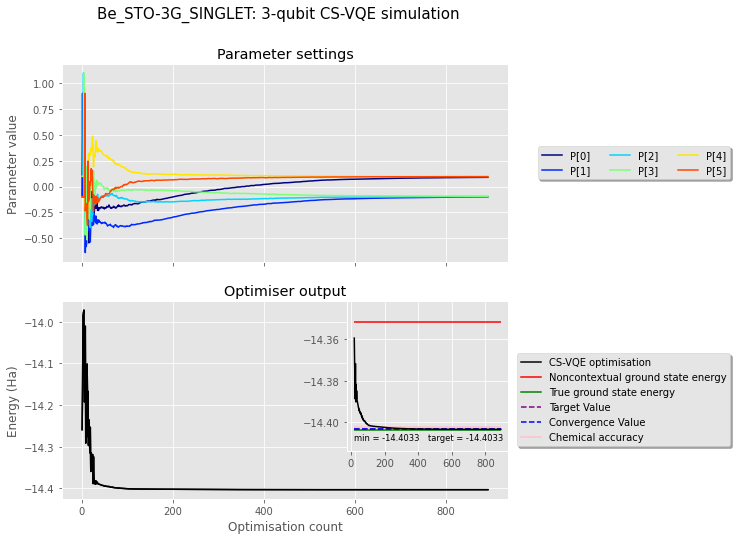

In [8]:
cs_vqe_results = mol_circ.CS_VQE(anz_terms=uccsd, 
                                 num_sim_q=num_sim_q, 
                                 optimizer=COBYLA(maxiter=1000))

title = '%s: %i-qubit CS-VQE simulation' % (speciesname, num_sim_q)
fig = plot.plot_parameter_settings(cs_vqe_results, title=title)